In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df  = pd.read_csv('../datasets/fc_transaction_base.csv')
df

,tran_date,account_number,branch,product,lcy_amount,transaction_code,description1,dc_indicator,is_salary
0,09/06/2020,02XYZXYZ10017529992,15.0,SBA,14500.00,CI,ATM WDL /00463701/NABIL\NABIL,withdraw,0.0
1,14/06/2020,02XYZXYZ10017529992,15.0,SBA,20000.00,CI,ATM WDL /00463701/NABIL\NABIL,withdraw,0.0
2,01/06/2020,02XYZXYZ10017517823,15.0,SBA,4000.00,CI,ATM WDL /NICAV701/\Pharping\KT,withdraw,0.0
3,05/06/2020,02XYZXYZ10017517823,15.0,SBA,500.00,CI,ATM WDL /NICAV701/\Pharping\KT,withdraw,0.0
4,12/06/2020,02XYZXYZ10017517823,15.0,SBA,5000.00,CI,ATM WDL /NICAV701/\Pharping\KT,withdraw,0.0
...,...,...,...,...,...,...,...,...,...
45027,16/08/2020,02XYZXYZ10017509810,17.0,SBA,1000.00,BI,CASBA allot of LAXMI UNNATI KOSH,withdraw,0.0
45028,16/08/2020,02XYZXYZ100172122201,17.0,SBA,1000.00,BI,CASBA allot of LAXMI UNNATI KOSH,withdraw,0.0
45029,16/08/2020,02XYZXYZ10017520310,17.0,SBA,5000.00,BI,CASBA allot of LAXMI UNNATI KOSH,withdraw,0.0
45030,16/08/2020,02XYZXYZ10017559076,17.0,SBA,0.38,IP,^0210017559076^:Int.Pd:^16-07-2020^ to ^16-08-202,deposit,0.0


In [3]:
df['tran_date'] = pd.to_datetime(df['tran_date'], format = '%d/%m/%Y', errors='coerce')

In [4]:
df

,tran_date,account_number,branch,product,lcy_amount,transaction_code,description1,dc_indicator,is_salary
0,2020-06-09,02XYZXYZ10017529992,15.0,SBA,14500.00,CI,ATM WDL /00463701/NABIL\NABIL,withdraw,0.0
1,2020-06-14,02XYZXYZ10017529992,15.0,SBA,20000.00,CI,ATM WDL /00463701/NABIL\NABIL,withdraw,0.0
2,2020-06-01,02XYZXYZ10017517823,15.0,SBA,4000.00,CI,ATM WDL /NICAV701/\Pharping\KT,withdraw,0.0
3,2020-06-05,02XYZXYZ10017517823,15.0,SBA,500.00,CI,ATM WDL /NICAV701/\Pharping\KT,withdraw,0.0
4,2020-06-12,02XYZXYZ10017517823,15.0,SBA,5000.00,CI,ATM WDL /NICAV701/\Pharping\KT,withdraw,0.0
...,...,...,...,...,...,...,...,...,...
45027,2020-08-16,02XYZXYZ10017509810,17.0,SBA,1000.00,BI,CASBA allot of LAXMI UNNATI KOSH,withdraw,0.0
45028,2020-08-16,02XYZXYZ100172122201,17.0,SBA,1000.00,BI,CASBA allot of LAXMI UNNATI KOSH,withdraw,0.0
45029,2020-08-16,02XYZXYZ10017520310,17.0,SBA,5000.00,BI,CASBA allot of LAXMI UNNATI KOSH,withdraw,0.0
45030,2020-08-16,02XYZXYZ10017559076,17.0,SBA,0.38,IP,^0210017559076^:Int.Pd:^16-07-2020^ to ^16-08-202,deposit,0.0


In [5]:
result = pd.DataFrame(df.groupby('account_number')['tran_date'].max())

In [6]:
result.columns

Index(['tran_date'], dtype='object')

In [7]:
result['Recent'] = (pd.to_datetime('now')-result['tran_date']).dt.days

In [8]:
result

,tran_date,Recent
account_number,,
02XYZXYZ10015339701,2020-08-16,1417
02XYZXYZ10015571501,2020-08-16,1417
02XYZXYZ10015571601,2020-08-16,1417
02XYZXYZ10015592101,2020-08-16,1417
02XYZXYZ10015593701,2020-08-14,1419
...,...,...
02XYZXYZ110017507494,2020-08-14,1419
02XYZXYZ110017507511,2020-07-28,1436
02XYZXYZ110017507523,2020-08-14,1419


In [9]:
result['frequency'] = df.groupby('account_number')['tran_date'].count()

In [10]:
result

,tran_date,Recent,frequency
account_number,,,
02XYZXYZ10015339701,2020-08-16,1417,28
02XYZXYZ10015571501,2020-08-16,1417,29
02XYZXYZ10015571601,2020-08-16,1417,4
02XYZXYZ10015592101,2020-08-16,1417,44
02XYZXYZ10015593701,2020-08-14,1419,21
...,...,...,...
02XYZXYZ110017507494,2020-08-14,1419,19
02XYZXYZ110017507511,2020-07-28,1436,36
02XYZXYZ110017507523,2020-08-14,1419,19


In [11]:
result['total'] = df.groupby('account_number')['lcy_amount'].sum()

In [12]:
result

,tran_date,Recent,frequency,total
account_number,,,,
02XYZXYZ10015339701,2020-08-16,1417,28,9222574.71
02XYZXYZ10015571501,2020-08-16,1417,29,4928227.77
02XYZXYZ10015571601,2020-08-16,1417,4,57616.10
02XYZXYZ10015592101,2020-08-16,1417,44,11712489.16
02XYZXYZ10015593701,2020-08-14,1419,21,4187990.01
...,...,...,...,...
02XYZXYZ110017507494,2020-08-14,1419,19,84277.79
02XYZXYZ110017507511,2020-07-28,1436,36,109061.32
02XYZXYZ110017507523,2020-08-14,1419,19,406725.50


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

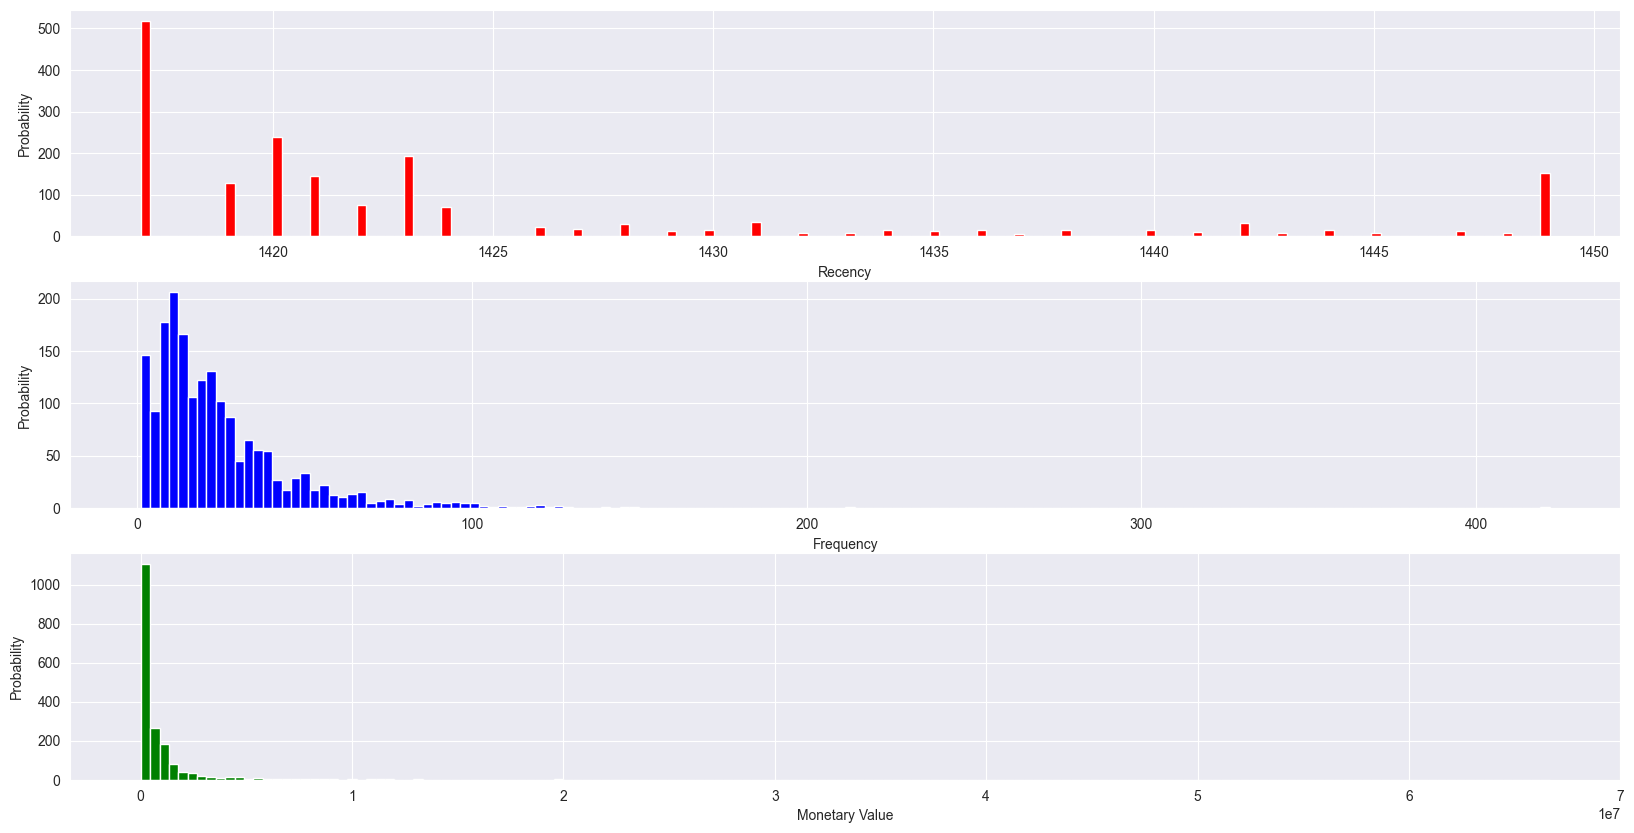

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(3, 1, 1) 
plt.hist(result.Recent, color='red', bins = 150)
plt.ylabel('Probability')
plt.xlabel('Recency')

plt.subplot(3, 1, 2) 
plt.hist(result.frequency, color='blue', bins = 150)
plt.ylabel('Probability')
plt.xlabel('Frequency')

plt.subplot(3, 1, 3) 
plt.hist(result.total, color='green', bins = 150)
plt.ylabel('Probability')
plt.xlabel('Monetary Value')

plt.show()

In [15]:
Rlabel = range(3,0,-1)
Flabel = range(1,4)
Mlabel = range(1,4)
               
Rgrp = pd.qcut(result.Recent,q=3,labels= Rlabel)
Fgrp = pd.qcut(result.frequency,q=3,labels= Flabel)
Mgrp = pd.qcut(result.total,q=3,labels= Mlabel)

In [16]:
result['R'] = Rgrp.values
result['F'] = Fgrp.values
result['M'] = Mgrp.values

In [17]:
result

,tran_date,Recent,frequency,total,R,F,M
account_number,,,,,,,
02XYZXYZ10015339701,2020-08-16,1417,28,9222574.71,3,3,3
02XYZXYZ10015571501,2020-08-16,1417,29,4928227.77,3,3,3
02XYZXYZ10015571601,2020-08-16,1417,4,57616.10,3,1,1
02XYZXYZ10015592101,2020-08-16,1417,44,11712489.16,3,3,3
02XYZXYZ10015593701,2020-08-14,1419,21,4187990.01,3,2,3
...,...,...,...,...,...,...,...
02XYZXYZ110017507494,2020-08-14,1419,19,84277.79,3,2,1
02XYZXYZ110017507511,2020-07-28,1436,36,109061.32,1,3,1
02XYZXYZ110017507523,2020-08-14,1419,19,406725.50,3,2,2


In [18]:
result['RFM']= result.apply(lambda x : str(x['R']) + str(x['F']) + str(x['M']), axis = 1)

In [19]:
result

,tran_date,Recent,frequency,total,R,F,M,RFM
account_number,,,,,,,,
02XYZXYZ10015339701,2020-08-16,1417,28,9222574.71,3,3,3,333
02XYZXYZ10015571501,2020-08-16,1417,29,4928227.77,3,3,3,333
02XYZXYZ10015571601,2020-08-16,1417,4,57616.10,3,1,1,311
02XYZXYZ10015592101,2020-08-16,1417,44,11712489.16,3,3,3,333
02XYZXYZ10015593701,2020-08-14,1419,21,4187990.01,3,2,3,323
...,...,...,...,...,...,...,...,...
02XYZXYZ110017507494,2020-08-14,1419,19,84277.79,3,2,1,321
02XYZXYZ110017507511,2020-07-28,1436,36,109061.32,1,3,1,131
02XYZXYZ110017507523,2020-08-14,1419,19,406725.50,3,2,2,322


In [20]:
result['RFM_alt'] = result[['R','F','M']].sum(axis = 1)

In [21]:
result

,tran_date,Recent,frequency,total,R,F,M,RFM,RFM_alt
account_number,,,,,,,,,
02XYZXYZ10015339701,2020-08-16,1417,28,9222574.71,3,3,3,333,9
02XYZXYZ10015571501,2020-08-16,1417,29,4928227.77,3,3,3,333,9
02XYZXYZ10015571601,2020-08-16,1417,4,57616.10,3,1,1,311,5
02XYZXYZ10015592101,2020-08-16,1417,44,11712489.16,3,3,3,333,9
02XYZXYZ10015593701,2020-08-14,1419,21,4187990.01,3,2,3,323,8
...,...,...,...,...,...,...,...,...,...
02XYZXYZ110017507494,2020-08-14,1419,19,84277.79,3,2,1,321,6
02XYZXYZ110017507511,2020-07-28,1436,36,109061.32,1,3,1,131,5
02XYZXYZ110017507523,2020-08-14,1419,19,406725.50,3,2,2,322,7


In [22]:
def rfm_level(df):
        if df['RFM_alt'] == 9:
            return 'Premium'
        elif df['RFM_alt'] >= 7:
            return 'Loyal'
        elif df['RFM_alt'] >= 4:
            return 'Potential'
        elif df['RFM_alt'] >= 3:
            return 'Promising'
        else:
            return 'Needs Attention'
result['RFM_level'] = result.apply(rfm_level, axis = 1)

In [23]:
result

,tran_date,Recent,frequency,total,R,F,M,RFM,RFM_alt,RFM_level
account_number,,,,,,,,,,
02XYZXYZ10015339701,2020-08-16,1417,28,9222574.71,3,3,3,333,9,Premium
02XYZXYZ10015571501,2020-08-16,1417,29,4928227.77,3,3,3,333,9,Premium
02XYZXYZ10015571601,2020-08-16,1417,4,57616.10,3,1,1,311,5,Potential
02XYZXYZ10015592101,2020-08-16,1417,44,11712489.16,3,3,3,333,9,Premium
02XYZXYZ10015593701,2020-08-14,1419,21,4187990.01,3,2,3,323,8,Loyal
...,...,...,...,...,...,...,...,...,...,...
02XYZXYZ110017507494,2020-08-14,1419,19,84277.79,3,2,1,321,6,Potential
02XYZXYZ110017507511,2020-07-28,1436,36,109061.32,1,3,1,131,5,Potential
02XYZXYZ110017507523,2020-08-14,1419,19,406725.50,3,2,2,322,7,Loyal


In [24]:
RFM_stats = result.groupby('RFM_level').agg({'Recent':'mean', 'frequency':'mean', 'total':['mean','count']}).round(1)
RFM_stats.columns = RFM_stats.columns.droplevel()
RFM_stats.columns = ['Recency_Mean','Frequency_Mean','Monetary_Value_Mean', 'Monetary_Value_Count']


In [25]:
RFM_stats

,Recency_Mean,Frequency_Mean,Monetary_Value_Mean,Monetary_Value_Count
RFM_level,,,,
Loyal,1419.5,32.1,1372622.9,590
Potential,1424.2,14.7,413712.7,710
Premium,1417.4,59.8,2869649.9,236
Promising,1442.1,5.2,39317.3,302


In [26]:
import squarify

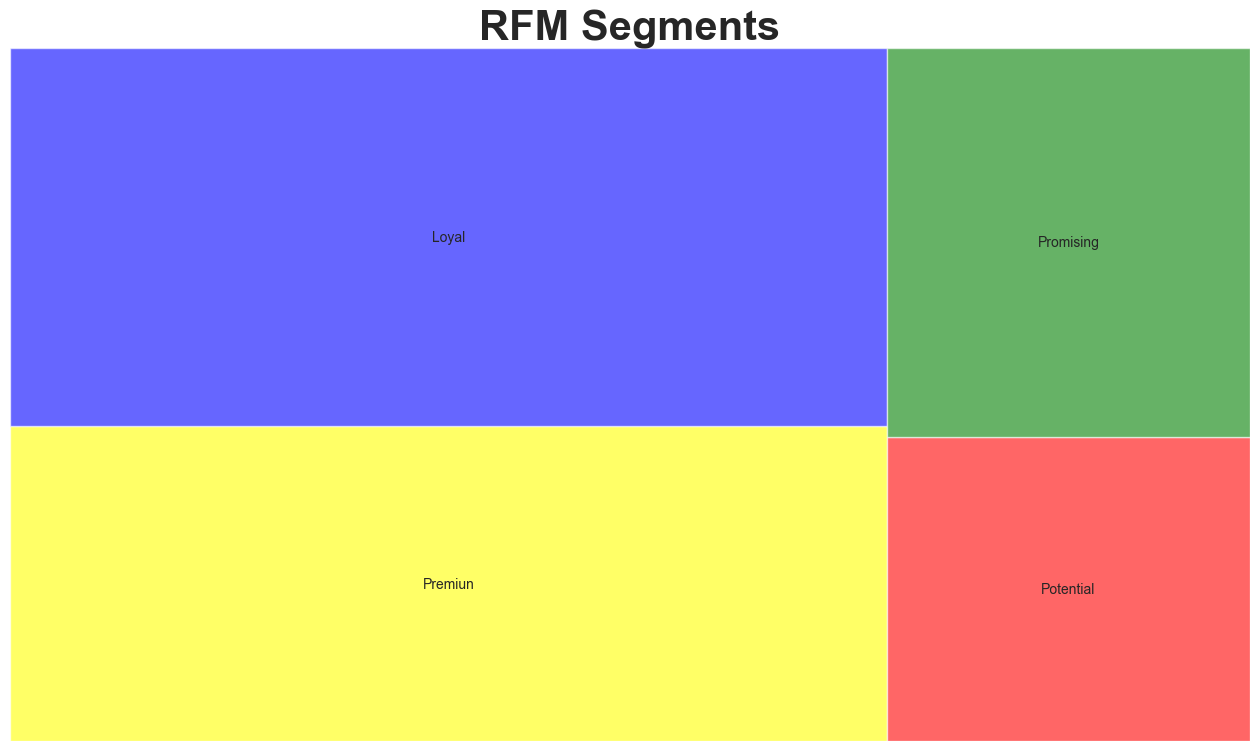

In [27]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16,9)
squarify.plot(sizes=RFM_stats['Monetary_Value_Count'],
              label = ['Premiun','Loyal', 'Potential', 'Promising'],
              color = ['yellow','blue', 'red', 'green'],
              alpha = .6)
plt.title('RFM Segments',fontsize = 30, fontweight = "bold")
plt.axis('off')
plt.show()